##### Choosing a setup

<a href="https://colab.research.google.com/github/rahil1303/dmt-assignment1-2025/blob/main/notebooks/Iteration_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

In [3]:
# Step 1: Clone the repo
#!git clone https://github.com/rahil1303/dmt-assignment1-2025.git

# Step 2: Change directory to your repo
#%cd dmt-assignment1-2025

# Step 3: Install dependencies (optional)
#!pip install -r requirements.txt

# Using locally:
#os.chdir('dmt-assignment1-2025')
os.chdir('..')
os.getcwd()

'/home/ivanka/data-mining/dmt-assignment1-2025'

In [335]:
df = pd.read_excel("data/ODI-2025.xlsx")

##### Setup for data changes

<small> This will make sure Pandas never changes data types silently, so conversions have to be handeled manually if needed.

In [336]:
pd.set_option('future.no_silent_downcasting', True)

#### Step 1: Rename columns for clarity 
The original dataset had long and inconsistent column names, including survey question text. To make the dataset easier to work with and improve readability in our code, I renamed the columns to concise names.

In [337]:
# rename columns
df = df.rename(columns={
    'Tijdstempel':'TIMESTAMP',
    'What programme are you in?': 'PROGRAM',
    'Have you taken a course on machine learning?': 'ML_COURSE',
    'Have you taken a course on information retrieval?': 'IR_COURSE',
    'Have you taken a course on statistics?': 'STAT_COURSE',
    'Have you taken a course on databases?': 'DB_COURSE',
    'What is your gender?':'GENDER',
    'I have used ChatGPT to help me with some of my study assignments ': 'CHATGPT_USAGE',
    'When is your birthday (date)?': 'BIRTHDAY',
    'How many students do you estimate there are in the room?': 'ROOM_ESTIMATE',
    'What is your stress level (0-100)?': 'STRESS_LEVEL',
    'How many hours per week do you do sports (in whole hours)? ': 'SPORTS_HOURS',
    'Give a random number': 'RANDOM_NUMBER',
    'Time you went to bed Yesterday': 'BEDTIME',
    'What makes a good day for you (1)?': 'GOOD_DAY_1',
    'What makes a good day for you (2)?': 'GOOD_DAY_2'
})

In [338]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
0,2025-04-01 12:17:06.560,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee
2,2025-04-01 12:17:16.917,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol
3,2025-04-01 12:17:20.718,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun
4,2025-04-01 12:17:23.836,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-


##### Step 2: Standardizing program names

In [339]:
# Clean and categorize the PROGRAM entries
def standardize_program(program):
    if pd.isna(program):
        return program

    program = str(program).lower()

    if re.search(r'\b(artificial|ai|intelligence)\b', program):
        return 'Artificial Intelligence'
    elif re.search(r'\b(computer science|cs|security|big|green)\b', program):
        return 'Computer Science'
    elif re.search(r'\bcomputational science\b', program):
        return 'Computational Science'
    elif re.search(r'\beconometrics\b', program):
        return 'Econometrics and Operations Research'
    elif re.search(r'\b(bioinformatics|bioinfomatics|biosb)\b', program):
        return 'Bioinformatics and Systems Biology'
    elif re.search(r'\bbusiness\b', program):
        return 'Business Analytics'
    elif re.search(r'\bfinance\b', program):
        return 'Finance and Technology'
    elif re.search(r'\bhuman|humanities\b', program):
        return 'Humanities Research'
    elif re.search(r'\bhealth\b', program):
        return 'Health Sciences'
    elif re.search(r'\bbiomedical\b', program):
        return 'Biomedical Sciences'
    elif re.search(r'\bfintech\b', program):
        return 'Fintech and Regulation'
    elif program in [
        "npn", "comp sci", "eor", "master", "ba"
    ]:
        return 'OTHER'
    else:
        return program.title()  # optional: title case for readability

# Apply once
df['PROGRAM'] = df['PROGRAM'].apply(standardize_program)


In [340]:
df["PROGRAM"].value_counts()

PROGRAM
Artificial Intelligence                                  100
Computer Science                                          50
Econometrics and Operations Research                      23
Bioinformatics and Systems Biology                        20
Computational Science                                     17
Business Analytics                                        16
Finance and Technology                                     6
OTHER                                                      5
Humanities Research                                        3
Health Sciences                                            1
Mathematics                                                1
Biomedical Sciences                                        1
Fintech and Regulation                                     1
B-123456789():;,.?-€/&@„_<|>#,{%^*+=•£$$< \N\+2332‘Mm      1
Name: count, dtype: int64

<small>**Note:** There is one entry in the PROGRAM column that appears to be corrupted. The row may still contain useful responses in other columns. For now, this instance is retained and categorized under OTHER to preserve potentially valuable information.

In [341]:
df.loc[df.tail(1).index, 'PROGRAM'] = 'OTHER'  # For the last entry

In [342]:
df.tail(1)

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
244,2025-04-01 12:29:46.856,OTHER,unknown,0,sigma,nee,intersex,no,"/U+200B/-1/-0/-0.0f/-0,0d Long int 12-0/:0;",-1,2147483649999999999,2149483649,9999999999999999999998899888888888777778889999...,0 AD,()€€€€& ../rm -rf ~/* hdhdhdh,Alcohol


In [343]:
df['PROGRAM'].value_counts()

PROGRAM
Artificial Intelligence                 100
Computer Science                         50
Econometrics and Operations Research     23
Bioinformatics and Systems Biology       20
Computational Science                    17
Business Analytics                       16
OTHER                                     6
Finance and Technology                    6
Humanities Research                       3
Health Sciences                           1
Mathematics                               1
Biomedical Sciences                       1
Fintech and Regulation                    1
Name: count, dtype: int64

PROBLEM:

<small> There are corrupted values in the last instance, under `BIRTHDAY` and `GOOD_DAY_1`

##### STEP 3: creating numerical values for courses

<small> Categorical values to numerical values for the following columns:
- **ML_COURSE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN
- **IR_COURSE**: `1` → 1, `0` → 0, `'unknown'` → NaN
- **DB_COURSE**: `'ja'` → 1, `'nee'` → 0, `'unknown'` → NaN
- **CHATGPT_USAGE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN

These mappings are stored in new columns (`_NUM`) as nullable integers (`Int64`).

In [344]:
# Mapping dictionary for each column and their corresponding transformations
mapping_dict = {
    'ML_COURSE': {'yes': 1, 'no': 0, 'unknown': np.nan},
    'IR_COURSE': {1: 1, 0: 0, 'unknown': np.nan},
    'DB_COURSE': {'ja': 1, 'nee': 0, 'unknown': np.nan},
    'CHATGPT_USAGE': {'yes': 1, 'no': 0, 'unknown': np.nan}
}

# Apply mappings and convert to 'Int64' for numerical columns where applicable
df['ML_COURSE_NUM'] = df['ML_COURSE'].map(mapping_dict['ML_COURSE']).astype('Int64')
df['IR_COURSE_NUM'] = df['IR_COURSE'].map(mapping_dict['IR_COURSE']).astype('Int64')
df['DB_COURSE_NUM'] = df['DB_COURSE'].map(mapping_dict['DB_COURSE']).astype('Int64')
df['CHATGPT_USAGE_NUM'] = df['CHATGPT_USAGE'].map(mapping_dict['CHATGPT_USAGE']).astype('Int64')

In [345]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel,1,<NA>,1,1
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee,1,1,1,1
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol,1,1,1,<NA>
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun,1,0,0,1
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-,1,1,1,1


##### Step 4: categorizing gender

In [346]:
df["GENDER"].value_counts()

GENDER
male                     137
female                    89
not willing to answer      9
gender fluid               4
intersex                   4
non-binary                 1
other                      1
Name: count, dtype: int64

<small> The `categorize_gender` function maps known gender values (`'male'`, `'female'`, `'not willing to answer'`) directly, while grouping all other values into the category `'gender_non_conforming'`. *Reasons: reducing the number of groups, making less-represented genders more visible, and promoting pseudonymization*

In [347]:
def categorize_gender(value):
    # Direct mapping for known values
    gender_map = {
        'male': 'male',
        'female': 'female',
        'not willing to answer': 'unknown'
    }
    
    # Apply map for known values, otherwise classify as 'gender_non_conforming'
    return gender_map.get(value, 'gender_non_conforming')

# Apply to the 'GENDER' column and save in 'GENDER_CATEGORIZED'
df['GENDER_CATEGORIZED'] = df['GENDER'].apply(categorize_gender)

In [348]:
df["GENDER_CATEGORIZED"].value_counts()

GENDER_CATEGORIZED
male                     137
female                    89
gender_non_conforming     10
unknown                    9
Name: count, dtype: int64

#### STEP 5: room estimate

In [349]:
df["ROOM_ESTIMATE"].unique()

array([400, 321, 200, 350, 500, 467, 250, 345, 300, 100, 550, '180-200',
       456, '20*5*5', 487, 490, 450, 600, 320, 150, 375, 187, 80, 220,
       430, 380, 5, 330, 385, 390, 195, 234, 480, 291, 420, 289, 70000,
       425, 287, 483, 'approx 300', 240, 357, 297, 366, 123, '300ish?',
       125, 378, 'Around 200', 280, 230, 118, 'Idk', 460, 340, 384, 9000,
       311, 253, -9999, 180, 458, 210, 10000, 387, 520, -3, -1],
      dtype=object)

<small> The `ROOM_ESTIMATE_CLEANED` column replaces irregular or ambiguous room estimate entries with standardized numerical values. *Reasons: consistency and handling unknown values as NaN.*

In [350]:
df['ROOM_ESTIMATE_CLEANED'] = df['ROOM_ESTIMATE'].replace({
    '180-200': 190,
    '20*5*5': 500,
    'approx 300': 300,
    '300ish?': 300,
    'Around 200': 200,
    'Idk': np.nan
})

In [351]:
df["ROOM_ESTIMATE_CLEANED"].unique()

array([400, 321, 200, 350, 500, 467, 250, 345, 300, 100, 550, 190, 456,
       487, 490, 450, 600, 320, 150, 375, 187, 80, 220, 430, 380, 5, 330,
       385, 390, 195, 234, 480, 291, 420, 289, 70000, 425, 287, 483, 240,
       357, 297, 366, 123, 125, 378, 280, 230, 118, nan, 460, 340, 384,
       9000, 311, 253, -9999, 180, 458, 210, 10000, 387, 520, -3, -1],
      dtype=object)

PROBLEM:

<small> There are still negative values or extreme over-estimations present, which will need further attention to avoid skewing analysis.

##### Step 6: stress level

In [352]:
df["STRESS_LEVEL"].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 'Over 9000', 79,
       '42.0', 85, 25, 110, 900, 22, 23, 67, 1, 69, 'π©', 7, 57, -10, 99,
       24, 87, -10000, 58, 23.23, 98, -1, 'Now? 22', 77, nan, 63, 61, 33,
       'I BELIEVE I CAN FLY', '2147483649999999999'], dtype=object)

<small> `STRESS_LEVEL` column contains the numbers students chose, just not numerical. There aren't a lot of these, so we map them into the right formatting. *NOTE: I assume 'I BELIEVE I CAN FLY' means stress level 0, but that might not be right.*

In [353]:
# Mapping non-numerical entries that contain numerical answers
stress_level_mapping = {
    'π©': 3.14,  
    'Over 9000': 9000,  
    '42.0': 42,  
    'Now? 22': 22,  
    'I BELIEVE I CAN FLY': 0,
}


def clean_stress_level(value):
    # if in dictionary, return the mapped value
    if value in stress_level_mapping:
        return stress_level_mapping[value]
    # otherwise return the original value
    return value

# Apply the cleaning
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL'].apply(clean_stress_level)


In [354]:
df['STRESS_LEVEL_CLEANED'].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 9000, 79, 85, 25, 110,
       900, 22, 23, 67, 1, 69, 3.14, 7, 57, -10, 99, 24, 87, -10000, 58,
       23.23, 98, -1, 77, nan, 63, 61, 33, '2147483649999999999'],
      dtype=object)

<small> `STRESS_LEVEL` column contains one number that is written as a string.

In [355]:
# Convert to numeric values, coercing errors to NaN
df['STRESS_LEVEL_CLEANED'] = pd.to_numeric(df['STRESS_LEVEL_CLEANED'], errors='coerce')

<small> `STRESS_LEVEL` column contains numbers out of bound 0-100 so we map anything that's lower then 0 to 0 and anything higher than 100 to 100.

In [356]:
# Cap values at 100 and set values below 0 to 0
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL_CLEANED'].clip(lower=0, upper=100)

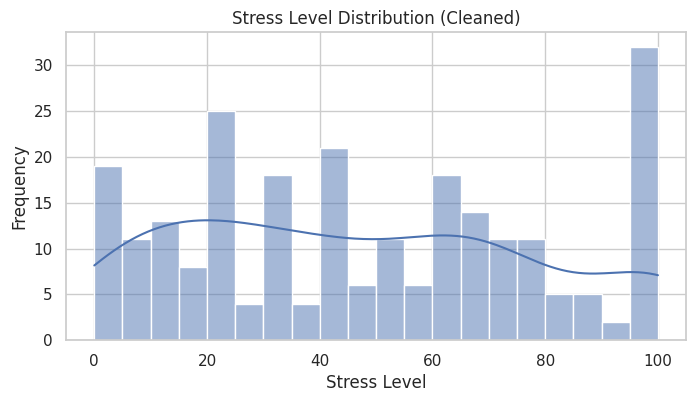

In [357]:
# Plot the cleaned column
plt.figure(figsize=(8,4))
sns.histplot(df['STRESS_LEVEL_CLEANED'].dropna(), bins=20, kde=True)
plt.title("Stress Level Distribution (Cleaned)")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


In [358]:
df['STRESS_LEVEL_CLEANED'].value_counts()

STRESS_LEVEL_CLEANED
100.00    28
20.00     19
40.00     19
30.00     17
60.00     16
0.00      12
50.00     11
70.00     10
10.00      9
75.00      8
15.00      8
65.00      6
69.00      6
5.00       5
80.00      5
25.00      4
2.00       4
85.00      3
45.00      3
55.00      3
35.00      3
8.00       3
22.00      2
90.00      2
42.00      2
47.00      2
23.00      2
58.00      2
11.00      2
13.00      2
99.00      2
6.00       2
72.00      1
49.00      1
78.00      1
99.70      1
89.00      1
3.00       1
37.00      1
79.00      1
66.00      1
1.00       1
3.14       1
7.00       1
57.00      1
67.00      1
24.00      1
87.00      1
23.23      1
98.00      1
77.00      1
63.00      1
61.00      1
33.00      1
Name: count, dtype: int64

PROBLEM:

<small> The chart provides no information so consider a different way to represent the values, or choose different bin sizes. Right now it groups in increments of 5 (bins=20).

#### Step 7: sports hours

In [359]:
df["SPORTS_HOURS"].unique()

array([0, 2, 4, 6, 8, 1, 3, 4.5, 7, 10, 12, '4-5', 9, 5, 69, 15, 20, 23,
       168, '4.5', '2h', '0😭😭😭', 'zero', '3-4', 16, 14, 200, 11, 4.6,
       '4.5 hours', 13, '&&&&', 2149483649], dtype=object)

<small> **Mapping known values:**
- mapping specific, inconsistent entries in the `SPORTS_HOURS` column to cleaner and standardized numeric values. For example, '4-5' becomes 4.5 (average of 4 and 5), '2h' becomes 2, and 'zero' or '0😭😭😭' becomes 0
- the column is converted to numeric values using `pd.to_numeric()` to handle any remaining non-numeric entries


In [360]:
# Mapping specific known values to cleaned versions
replace_map = {
    '4-5': 4.5, # Average of 4 and 5
    'zero': 0,
    '0😭😭😭': 0,
    '2h': 2,
    '4.5 hours': 4.5,
    '4.5': 4.5,
    '3-4': 3.5,  # Average of 3 and 4
    '&&&&': np.nan,  # Replace unrecognizable characters with NaN
}

# replace the values in 'SPORTS_HOURS' column
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS'].replace(replace_map)

# convert values to float
df['SPORTS_HOURS_CLEANED'] = pd.to_numeric(df['SPORTS_HOURS_CLEANED'], errors='coerce')

<small> **Handling unreasonable values:**
   - A threshold of 60 hours per week is applied, as anything beyond this is considered an unrealistic entry. Any values greater than 60 are replaced with `NaN` to avoid distortions for now

In [361]:
# the threshold for maximum possible exercise hours per week
max_exercise_hours = 60

# replace values greater than max_exercise_hours with NaN
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS_CLEANED'].apply(
    lambda x: np.nan if x > max_exercise_hours else x
)

In [363]:
df['SPORTS_HOURS_CLEANED'].unique()

array([ 0. ,  2. ,  4. ,  6. ,  8. ,  1. ,  3. ,  4.5,  7. , 10. , 12. ,
        9. ,  5. ,  nan, 15. , 20. , 23. ,  3.5, 16. , 14. , 11. ,  4.6,
       13. ])

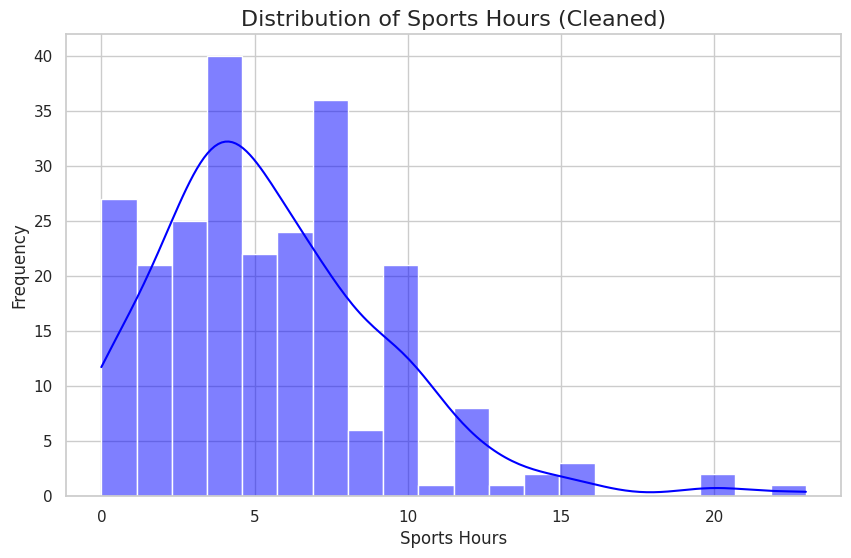

In [365]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution of cleaned sports hours
plt.figure(figsize=(10, 6))
sns.histplot(df['SPORTS_HOURS_CLEANED'], kde=True, color="blue", bins=20)  # kde=True adds a density curve
plt.title("Distribution of Sports Hours (Cleaned)", fontsize=16)
plt.xlabel("Sports Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


PROBLEM:

<small> Inadequate graph to represent the data.

##### Step 9: random numbers

In [366]:
df["RANDOM_NUMBER"].unique()

array([928393, 31416, 5, 37, 1, 0, 4, 6656678, 888, '420420420420420420',
       3, 538299189101, 1984, 72, 7, 94, 13, 28, 9, 8, 6372, 27, 9999, 78,
       38, 19, 777, 74, 99, 25, 108, 4738, 11011011, 87, 39,
       '77945354356758979022123', 1934, 69420, 14, 69, 420, 66,
       '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u',
       '2324234234234432434', 73, -1, 358, 42, 61, 6969696, 95836,
       'Random', 12, 47, 89, 4141, 15, 6, 168, 5347833, 7777, 77, 30, 10,
       197367, 40, 11, 9581995819194, 89867, 658, 236, 1738,
       '184365902143674301', 33, 64, 314159265359, 44, 426, 891230124,
       124, 9999999999, 67, 23, 'Ø', 81, 3737,
       '245819732157863251872726618812736168172715169485342146436918753',
       'cleanMe12', 18282, 17, 75, 46789901874822496, 31,
       'achtduizendvierhonderdvijfendertig komma zesenvijftig',
       173425111379664, 271828, 21, 1672, 823, 51, 8473, '27.4', 22,
       55678686, 90, '85828228182566372

<small> 

- **Mapping Specific Known Values:**  
  Specific, known values are mapped to clean numeric equivalents or `NaN`. For example, `‘cleanMe12’` becomes 12, and strings like `‘Ø’` or `‘Random’` or the emoji (such as `‘😅’`) are replaced with `NaN`.

- **Converting Strings to Numeric Values:**  
  The function attempts to convert any string representation of numbers (like `‘-69420’`) into actual numeric values.


In [367]:
def clean_random_number(value):
    # Define the specific mappings
    mappings = {
        'Random': np.nan,
        'cleanMe12': 12,
        'achtduizendvierhonderdvijfendertig komma zesenvijftig': 8435.56,
        'Ø': np.nan,
        '“-69420”': -69420,
        '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u': np.nan
    }
    
    # check if it's an emoji
    if isinstance(value, str) and re.match(r'\U0001F605', value):  # Checks for '😅' emoji
        return np.nan
    
    # the value is in the mapping
    if value in mappings:
        return mappings[value]
    
    # numeric strings and other cases
    try:
        # convert to a number if possible (this will handle things like "-69420")
        return float(value)
    except ValueError:
        return value

# Apply the cleaning function to the column
df['RANDOM_NUMBER_CLEANED'] = df['RANDOM_NUMBER'].apply(clean_random_number)

In [368]:
df["RANDOM_NUMBER_CLEANED"].unique()

array([928393.0, 31416.0, 5.0, 37.0, 1.0, 0.0, 4.0, 6656678.0, 888.0,
       4.204204204204204e+17, 3.0, 538299189101.0, 1984.0, 72.0, 7.0,
       94.0, 13.0, 28.0, 9.0, 8.0, 6372.0, 27.0, 9999.0, 78.0, 38.0, 19.0,
       777.0, 74.0, 99.0, 25.0, 108.0, 4738.0, 11011011.0, 87.0, 39.0,
       7.794535435675898e+22, 1934.0, 69420.0, 14.0, 69.0, 420.0, 66.0,
       nan, 2.3242342342344325e+18, 73.0, -1.0, 358.0, 42.0, 61.0,
       6969696.0, 95836.0, 12.0, 47.0, 89.0, 4141.0, 15.0, 6.0, 168.0,
       5347833.0, 7777.0, 77.0, 30.0, 10.0, 197367.0, 40.0, 11.0,
       9581995819194.0, 89867.0, 658.0, 236.0, 1738.0,
       1.843659021436743e+17, 33.0, 64.0, 314159265359.0, 44.0, 426.0,
       891230124.0, 124.0, 9999999999.0, 67.0, 23.0, 81.0, 3737.0,
       2.4581973215786324e+62, 18282.0, 17.0, 75.0, 4.67899018748225e+16,
       31.0, 8435.56, 173425111379664.0, 271828.0, 21.0, 1672.0, 823.0,
       51.0, 8473.0, 27.4, 22.0, 55678686.0, 90.0, 8.582822818256637e+20,
       76.0, 158.0, 1.010

In [369]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,Travel,1,<NA>,1,1,male,400,78.0,0.0,928393.0
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,coffee,1,1,1,1,female,321,100.0,2.0,31416.0
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,Aperol,1,1,1,<NA>,male,200,100.0,4.0,5.0
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,Sun,1,0,0,1,male,350,60.0,6.0,37.0
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,-,1,1,1,1,male,500,50.0,8.0,1.0


##### Step 10: Birthday

In [370]:
df["BIRTHDAY"].unique()

array(['01-01-1888', '31/01/2002', 'September ', '17/10/2003',
       '19/04/2000', 'Tomorrow', '25/10/1999', '1 april', '29/01/2001',
       '01082000', '19/10/1999', '1-1-1999', '01012000', 'June 15 2001',
       '01', '27/02/2001', '10-05-1982', '16.12.1998', '23/06/2002',
       '10/08/2000', '30-12-2003', '11 August', 'Idk', '04/19/2000',
       '19/07/2003', '19 February ', '19.05.2000', 'September 14', 1999,
       '11.12.2001', '24.01.1999', '29-070-2000', '24 de Diciembre ',
       '01/06/2000', '11-11-00', '05.11.1997', '27-11-2002', '20/07/2001',
       2000, '23-12-2002', '16/03/2002', '09-05-2002', '18-05-2003',
       '11/11/2002', 26, '29th September 2001', '21-11-2002',
       'December 14th', '2001-09-16', 1997, '16-08-1996', '69.69.2069',
       '26/11/1998', '23 maart', '14-09-2000', '-', '20.05.2001',
       '28-12-1999', 'January 16th', '23-05', '19 July 1997',
       '10/12/1994', '20.06', '30/09/2002', '01-01-1900', 23, '15-02',
       '13/03/2002', '08.10.2001',


  - All values in the `BIRTHDAY` are converted to strings and any leading or trailing spaces are removed

  - `normalize_date_string`
    - converts the string to lowercase.
    - removes `st`, `nd`, `rd`, `th`
    - replaces non-English month names with English equivalents
    - standardizes delimiters

  - parse the cleaned date strings into actual datetime objects using the `parse` function from the `dateutil.parser` module
  - dictionary `fixable_mapping` is used to map these problematic values to their correct date format and apply the `pd.to_datetime` function to ensure that all valid dates are properly formatted as datetime objects.

In [371]:
# convert everything into a string and remove spaces
df['BIRTHDAY'] = df['BIRTHDAY'].astype(str).str.strip()

In [372]:
# normalize the strings
def normalize_date_string(val):
    val = val.lower()
    val = re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', val)  # Remove suffixes
    val = val.replace('de diciembre', 'december')
    val = val.replace('augustus', 'august')
    val = re.sub(r'[-.\s]', '/', val)  # Standardize delimiters
    return val.strip()

df['BIRTHDAY_CLEANED'] = df['BIRTHDAY'].dropna().apply(normalize_date_string)


In [373]:
def try_parse_date(val):
    try:
        return parse(val, dayfirst=True, fuzzy=True)
    except:
        return pd.NaT

df['BIRTHDAY_CLEANED'] = df['BIRTHDAY_CLEANED'].apply(try_parse_date)


In [374]:
fixable_mapping = {
    "01082000": "2000-08-01",
    "01012000": "2000-01-01",
    "10112000": "2000-11-10",
    "08031998": "1998-03-08",
    "05082000": "2000-08-05",
    "21052025": "2025-05-21",
    "23 maart": "2025-03-23",
    "16 juni 2001": "2001-06-16",
    "07 232001": "2001-07-23",
    "de vijftiende dag van de vierde maand": "2025-04-15",
    "24.01.":"2025-01-24",
    "29-070-2000": "2000-07-29",
}

# Replace values in BIRTHDAY_CLEANED
df.loc[df['BIRTHDAY'].isin(fixable_mapping.keys()), 'BIRTHDAY_CLEANED'] = \
    df['BIRTHDAY'].map(fixable_mapping).apply(pd.to_datetime)

In [376]:
# compare the values
pd.set_option('display.max_rows', None)
# Create a new DataFrame with both columns for side-by-side comparison
comparison_df = pd.concat([df['BIRTHDAY'], df['BIRTHDAY_CLEANED']], axis=1)

# Rename the columns for clarity
comparison_df.columns = ['BIRTHDAY', 'BIRTHDAY_CLEANED']
nat_comparison = comparison_df[comparison_df['BIRTHDAY_CLEANED'].isna()]
nat_comparison

,BIRTHDAY,BIRTHDAY_CLEANED
5,Tomorrow,NaT
22,Idk,NaT
52,69.69.2069,NaT
56,-,NaT
81,not today,NaT
86,X,NaT
90,-,NaT
91,Lol,NaT
101,Muhahahah,NaT
118,0000,NaT


In [377]:
df["BIRTHDAY_CLEANED"].describe()

count                              227
mean     2006-01-15 14:48:06.343612288
min                1888-01-01 00:00:00
25%                2000-08-10 00:00:00
50%                2002-02-24 00:00:00
75%                2025-01-11 00:00:00
max                2069-09-06 00:00:00
Name: BIRTHDAY_CLEANED, dtype: object

#### Additional Cleaning for Birthday

I used the `BIRTHDAY_CLEANED` column to determine which individuals provided valid birth dates and which ones did not:
1. **Age Calculation**: 
   - I calculated the person's age.
   - **Age = 0**: the individual only provided the month and day, with no year -> their birthday occurred this year
   - **Age = -1**: the individual only provided the month and day, with no year -> their birthday didn't occur this year
   - **Deep Negative Ages**: indicate an unrealistic date -> flagged as invalid
   - **Deep Positive Ages**: very high positive ages -> the provided date is also incorrect

2. **Handling Valid Ages**: for valid entries with a reasonable age, I calculated the corresponding age

3. **Handling Incomplete or Invalid Data**: 
   - for individuals where the age could not be determined but the birthday was provided, I kept the month and day, omitting the year
   - for those with no valid date or problematic entries -> no value

4. **Column Cleanup**: I dropped the original `BIRTHDAY_CLEANED` column after processing the data, but kept `AGE`, `BIRTHDAY_MONTH` and `BIRTHDAY_DAY`


In [378]:
# Function to calculate age based on BIRTHDAY_CLEANED without adjusting the year
def calculate_age(birthday):
    if pd.isna(birthday):
        return None
    today = datetime.today()
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age

# Calculate and create a new column for age
df['AGE'] = df['BIRTHDAY_CLEANED'].apply(calculate_age)

In [439]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,AGE,BIRTHDAY_MONTH,BIRTHDAY_DAY,BEDTIME_CLEANED
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,1,male,400,78.0,0.0,928393.0,<NA>,1,1,00:00:00
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,1,female,321,100.0,2.0,31416.0,23,1,31,12:30:00
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,<NA>,male,200,100.0,4.0,5.0,<NA>,9,10,00:30:00
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,1,male,350,60.0,6.0,37.0,21,10,17,23:00:00
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,1,male,500,50.0,8.0,1.0,24,4,19,12:00:00


In [380]:
df["AGE"].value_counts()


AGE
-1.0      38
 23.0     37
 24.0     34
 22.0     32
 0.0      20
 25.0     19
 21.0     17
 26.0     11
 28.0      4
 27.0      4
 20.0      2
 137.0     1
 42.0      1
 30.0      1
 125.0     1
 90.0      1
 34.0      1
 103.0     1
-45.0      1
 33.0      1
Name: count, dtype: int64

In [381]:
# Set age values greater than 60 or less than -1 to NaN
df.loc[(df['AGE'] > 42) | (df['AGE'] < -1), 'AGE'] = pd.NA

In [382]:
df['BIRTHDAY_MONTH'] = df['BIRTHDAY_CLEANED'].dt.month
df['BIRTHDAY_DAY'] = df['BIRTHDAY_CLEANED'].dt.day

In [383]:
df.loc[df['AGE'].isin([0, -1]), 'AGE'] = np.nan

In [384]:
# Using Int64 type, which supports <NA> for missing values
df['AGE'] = df['AGE'].astype('Int64')
df['BIRTHDAY_DAY'] = df['BIRTHDAY_DAY'].astype('Int64')
df['BIRTHDAY_MONTH'] = df['BIRTHDAY_MONTH'].astype('Int64')

In [385]:
df = df.drop("BIRTHDAY_CLEANED", axis=1)

In [386]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,AGE,BIRTHDAY_MONTH,BIRTHDAY_DAY
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,1,1,male,400,78.0,0.0,928393.0,<NA>,1,1
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,1,1,female,321,100.0,2.0,31416.0,23,1,31
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,1,<NA>,male,200,100.0,4.0,5.0,<NA>,9,10
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,0,1,male,350,60.0,6.0,37.0,21,10,17
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,1,1,male,500,50.0,8.0,1.0,24,4,19


##### Step 11: standardize time

In [422]:
import pandas as pd
import numpy as np

def preprocess_bedtime(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).strip().lower()
    value = re.sub(r'\s*am\s*', ' AM', value, flags=re.IGNORECASE)
    value = re.sub(r'\s*pm\s*', ' PM', value, flags=re.IGNORECASE)
    value = re.sub(r'(\d{4})', lambda m: f'{int(m.group(1)) // 100:02}:{m.group(1)[-2:]}', value)

    # Handle vague times like 'around midnight'
    if 'midnight' in value:
        return "00:00"

    # Replace 'u' with ':'
    value = value.replace('u', ':')

    # Replace dash or h with colon
    value = value.replace('-', ':').replace('h', ':').replace('.',':')

    # If the value is in a format like '12.30am', adjust it
    if 'am' in value.lower() or 'pm' in value.lower():
        value = value.replace('am', '').replace('pm', '').replace(' AM', ':00').replace(' PM', ':00')

    if re.fullmatch(r"\d{1,2}", value):
        value = f"{int(value):02}:00"

    return value

# Apply to the dataframe
df['BEDTIME_PREP'] = df['BEDTIME'].apply(preprocess_bedtime)


In [423]:
def fuzzy_parse_time(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower().strip()
    try:
        dt = parse(text, fuzzy=True)
        return dt.time()
    except Exception:
        return np.nan

df['BEDTIME_CLEANED'] = df['BEDTIME_PREP'].apply(fuzzy_parse_time)

In [428]:
df = df.drop('BEDTIME_PREP', axis = 1)

In [429]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,AGE,BIRTHDAY_MONTH,BIRTHDAY_DAY,BEDTIME_CLEANED
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,1,male,400,78.0,0.0,928393.0,<NA>,1,1,00:00:00
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,1,female,321,100.0,2.0,31416.0,23,1,31,12:30:00
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,<NA>,male,200,100.0,4.0,5.0,<NA>,9,10,00:30:00
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,1,male,350,60.0,6.0,37.0,21,10,17,23:00:00
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,1,male,500,50.0,8.0,1.0,24,4,19,12:00:00


In [430]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

## Current state of data

In [431]:
# Overview of data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TIMESTAMP              245 non-null    datetime64[ns]
 1   PROGRAM                245 non-null    object        
 2   ML_COURSE              245 non-null    object        
 3   IR_COURSE              245 non-null    object        
 4   STAT_COURSE            245 non-null    object        
 5   DB_COURSE              245 non-null    object        
 6   GENDER                 245 non-null    object        
 7   CHATGPT_USAGE          245 non-null    object        
 8   BIRTHDAY               245 non-null    object        
 9   ROOM_ESTIMATE          245 non-null    object        
 10  STRESS_LEVEL           244 non-null    object        
 11  SPORTS_HOURS           245 non-null    object        
 12  RANDOM_NUMBER          245 non-null    object        
 13  BEDTI

TIMESTAMP                 0
PROGRAM                   0
ML_COURSE                 0
IR_COURSE                 0
STAT_COURSE               0
DB_COURSE                 0
GENDER                    0
CHATGPT_USAGE             0
BIRTHDAY                  0
ROOM_ESTIMATE             0
STRESS_LEVEL              1
SPORTS_HOURS              0
RANDOM_NUMBER             0
BEDTIME                   0
GOOD_DAY_1                0
GOOD_DAY_2                0
ML_COURSE_NUM             2
IR_COURSE_NUM            24
DB_COURSE_NUM             8
CHATGPT_USAGE_NUM        41
GENDER_CATEGORIZED        0
ROOM_ESTIMATE_CLEANED     1
STRESS_LEVEL_CLEANED      1
SPORTS_HOURS_CLEANED      5
RANDOM_NUMBER_CLEANED     5
AGE                      81
BIRTHDAY_MONTH           18
BIRTHDAY_DAY             18
BEDTIME_CLEANED           2
dtype: int64

## Work in progress...

In [437]:
df['GOOD_DAY_1'].str.lower()

0                                            food
1                                             sun
2                                        zonnetje
3                                             sun
4                                               -
5                                       chocolate
6                                             sun
7                                       good food
8                                            sun1
9                                  work done good
10                                     good food 
11                                          pizza
12                                      good food
13                                    mama’s food
14                                      good work
15                                passing courses
16                                          drugs
17                                         coffee
18                                       nothing 
19                                  passing grade


## Example of an analysis

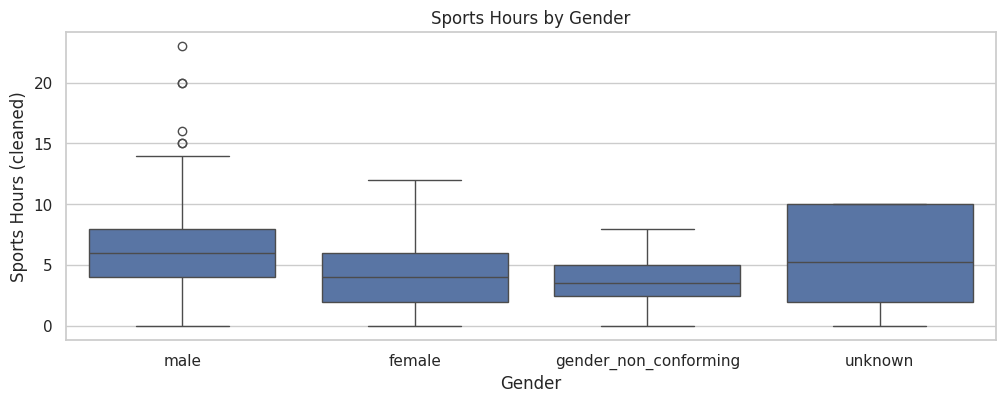

In [438]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,
            x='GENDER_CATEGORIZED',
            y='SPORTS_HOURS_CLEANED')
plt.title("Sports Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Sports Hours (cleaned)")
plt.show()


PROBLEM:

<small> This is just an illustration. The graph isn't providing any valuable information. It is the right kind of graph, but needs to be adapted.